In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import ast
from sklearn.utils import shuffle

In [2]:
#Loading the datasets to build the autoencoder

training_data=pd.read_csv('csv_trial_3.csv')
#matrix = np.array(training_data)
training_data.shape
training_data

,x_coordinate,y_coordinate,young's modulus
0,0.02,0.02,2
1,0.02,0.14,2
2,0.02,0.26,2
3,0.02,0.38,2
4,0.02,0.50,2
...,...,...,...
1084,3.86,3.38,2
1085,3.86,3.50,2
1086,3.86,3.62,2
1087,3.86,3.74,2


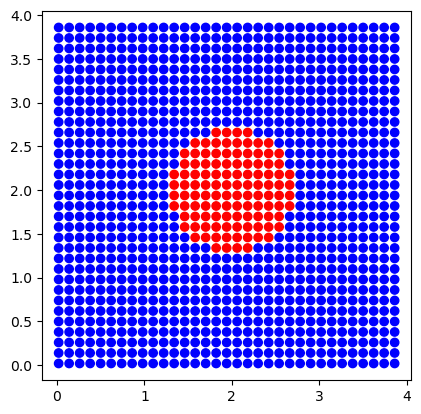

In [3]:
#Extract the x and y coordinates from the "coordinates" column, and young's modulus
x_coords = np.array(training_data["x_coordinate"])
y_coords = np.array(training_data["y_coordinate"])
youngs_modulus = np.array(training_data["young's modulus"])

# Get the color based on the youngs_modulus value
colors = ['red' if val==1 else 'blue' for val in youngs_modulus]

# Create the scatter plot
plt.gca().set_aspect('equal')
plt.scatter(x_coords, y_coords, c=colors)

# Show the plot
#plt.show()
#plt.plot(x_coords, y_coords, '.')

In [4]:
print(x_coords)
print(x_coords.shape)
print(y_coords.shape)
print(youngs_modulus.shape)

[0.02 0.02 0.02 ... 3.86 3.86 3.86]
(1089,)
(1089,)
(1089,)


In [5]:
#normalize the data to increase the encoders accuracy
x_coords = x_coords/3.86
y_coords = y_coords/3.86
youngs_modulus = youngs_modulus/2
print(x_coords)
print(youngs_modulus)

[0.00518135 0.00518135 0.00518135 ... 1.         1.         1.        ]
[1. 1. 1. ... 1. 1. 1.]


In [6]:
#Shuffle the data the training sets have a representative distribution of samples

x_coords, y_coords, youngs_modulus = shuffle(x_coords, y_coords, youngs_modulus, random_state=42)

x_train = x_coords
y_train = y_coords
z_train = youngs_modulus

len(x_train)

1089

In [7]:
# Concatenate the input data into a single tensor
train_data = np.concatenate([x_train.reshape(-1, 1089, 1), y_train.reshape(-1, 1089, 1), z_train.reshape(-1, 1089, 1)], axis=-1)
#train_data = np.concatenate([x_train, y_train, z_train], axis=-1)
#test_data = np.concatenate([x_test, y_test, z_test], axis=-1)
print(train_data.shape)
#print(test_data.shape)
train_data

(1, 1089, 3)


array([[[0.31606218, 0.78238342, 1.        ],
        [0.03626943, 0.72020725, 1.        ],
        [0.44041451, 0.50259067, 0.5       ],
        ...,
        [0.0984456 , 0.68911917, 1.        ],
        [0.96891192, 0.65803109, 1.        ],
        [0.8134715 , 0.06735751, 1.        ]]])

In [17]:
# Define the shape of the input data
input_shape = (len(x_train), 3)

# Define the encoder network
encoder_input = keras.Input(shape=input_shape, name='encoder_input')
x = keras.layers.Flatten()(encoder_input)
x = keras.layers.Dense(500, activation='relu')(x)
x = keras.layers.Dense(250, activation='relu')(x)
x = keras.layers.Dense(150, activation='relu')(x)
encoder_output = keras.layers.Dense(72, activation='relu')(x)

encoder= keras.Model(encoder_input, encoder_output, name= "encoder")

# Define the decoder network
decoder_input = keras.layers.Dense(150, activation='relu')(encoder_output)
x = keras.layers.Dense(250, activation='relu')(decoder_input)
x = keras.layers.Dense(500, activation='relu')(x)
x = keras.layers.Dense(len(x_train)*3, activation='sigmoid')(x)
decoder_output = keras.layers.Reshape((len(x_train), 3))(x)

# Define the autoencoder model
autoencoder = keras.Model(inputs=encoder_input, outputs=decoder_output, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 1089, 3)]         0         
                                                                 
 flatten_1 (Flatten)         (None, 3267)              0         
                                                                 
 dense_8 (Dense)             (None, 500)               1634000   
                                                                 
 dense_9 (Dense)             (None, 250)               125250    
                                                                 
 dense_10 (Dense)            (None, 150)               37650     
                                                                 
 dense_11 (Dense)            (None, 72)                10872     
                                                                 
 dense_12 (Dense)            (None, 150)               

In [9]:
# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

In [10]:
# Train the autoencoder
history = autoencoder.fit(x=train_data, y=train_data,
                          epochs=100, batch_size=32, shuffle=True)

Epoch 1/100
1/1 [==============================] - 0s 290ms/step - loss: 0.1334
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1307
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1161
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0829
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0422
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0246
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0206
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0155
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0142
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0127
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0104
Epoch 13/100
1/1 [==============================] - 0s 7ms/

In [11]:
#Printing the original test data to comapare with the predicted data set later
print(train_data)

[[[0.31606218 0.78238342 1.        ]
  [0.03626943 0.72020725 1.        ]
  [0.44041451 0.50259067 0.5       ]
  ...
  [0.0984456  0.68911917 1.        ]
  [0.96891192 0.65803109 1.        ]
  [0.8134715  0.06735751 1.        ]]]


In [12]:
#Running the encoder just to observe the encoded or reduced data set
reduced_data=encoder.predict(train_data)
print("Reduced data has shape of:", reduced_data.shape)
print(reduced_data)

1/1 [==============================] - 0s 63ms/step
Reduced data has shape of: (1, 72)
[[ 0.          0.          4.243431    0.          0.          0.
   0.          0.          0.          0.          0.          0.
   6.0370436   0.          0.          0.         16.467758    0.
   0.          0.         10.93773     0.          0.          0.
   0.          5.9732375   0.          0.          0.          0.
   0.          0.          0.          0.          0.          4.6698494
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
  23.324568    5.556475    0.         20.143402    0.          0.
   0.          0.81162226 13.186946    0.          0.53568166  9.444826
   0.          2.2671258   0.          3.2618372   0.          0.        ]]


In [13]:
# Use the trained autoencoder to predict on the test data
predicted_data = autoencoder.predict(train_data)

# Print the shape of the predicted data
print(predicted_data.shape)
print(predicted_data)


1/1 [==============================] - 0s 66ms/step
(1, 1089, 3)
[[[0.315365   0.7818803  0.99016786]
  [0.02336507 0.718658   0.9908327 ]
  [0.43952766 0.50170684 0.49973226]
  ...
  [0.09955854 0.68864995 0.99469465]
  [0.9797041  0.65672517 0.99519193]
  [0.81191814 0.06641924 0.99422044]]]


In [14]:
# Calculate the difference between predicted_data and test_data
diff = predicted_data - train_data

# Calculate the mean absolute error
mae = np.mean(np.abs(diff))

# Calculate the percentage error
pct_error = np.mean(np.abs(diff) / train_data) * 100

print("Mean absolute error:", mae)
print("Percentage error:", pct_error, "%")

Mean absolute error: 0.0024836133425760786
Percentage error: 1.202878464379498 %


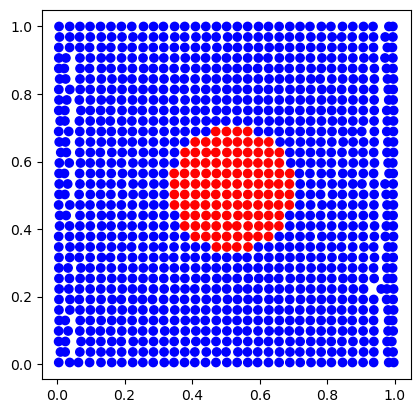

In [16]:
# Extract x and y coordinates from predicted data
x_pred = predicted_data[0,:,0]
y_pred = predicted_data[0,:,1]

# Define colors based on youngs modulus values
colors = np.where(predicted_data[0,:,2] > 0.75, 'blue', 'red')

# Create scatter plot
fig, ax = plt.subplots()
ax.scatter(x_pred, y_coords, c=colors)

# Set aspect ratio to be equal
ax.set_aspect('equal')

# Show the plot
plt.show()

In [24]:
#prediction_data = np.array(predicted_data)

#np.savetxt("prediction.csv", prediction_data.reshape(-1, 3), delimiter=" ", header="x_coord,y_coord,youngs_modulus", comments="")
